<a href="https://colab.research.google.com/github/JUNYA-727/MASKRCNN-clack-detection/blob/main/clack_check_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from PIL import Image,ImageDraw
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

In [7]:
path=['/content/7002-27.json','/content/7002-67.json']
for json_path in path:
  with open(json_path)as f:
    data=json.loads(f.read())
  shape=data['shapes'][0]
  label=shape['label']
  points=shape['points']
  shape_type=shape['shape_type']
  print(shape)
  print(label)
  print(points)
  print(shape_type)

{'label': 'clack', 'points': [[113.37125748502994, 0.03592814371258157], [115.16766467065868, 14.407185628742525], [131.33532934131736, 12.610778443113773], [145.70658682634732, 20.395209580838326], [156.48502994011977, 34.76646706586827], [170.2574850299401, 40.1556886227545], [181.63473053892216, 50.93413173652695], [195.40718562874252, 52.73053892215569], [196.60479041916167, 67.7005988023952], [207.98203592814372, 74.88622754491018], [216.36526946107784, 74.88622754491018], [228.94011976047906, 82.67065868263472], [241.51497005988026, 83.8682634730539], [255, 93], [255, 85], [241.51497005988026, 77.28143712574851], [229.53892215568862, 76.68263473053892], [219.35928143712576, 67.7005988023952], [204.98802395209583, 63.50898203592814], [200.19760479041918, 43.748502994011986], [183.4311377245509, 43.1497005988024], [170.2574850299401, 33.568862275449106], [163.07185628742516, 29.976047904191617], [146.30538922155688, 7.221556886227546]], 'group_id': None, 'shape_type': 'polygon', 'f

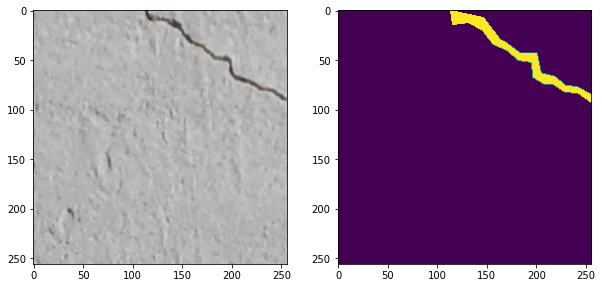

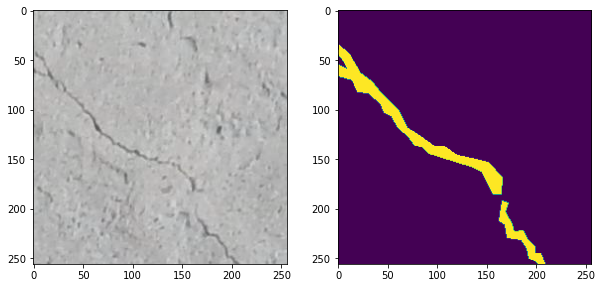

In [42]:
path=['/content/7002-27.json','/content/7002-67.json']
for i,json_path in enumerate(path):
  with open(json_path)as f:
    data=json.loads(f.read())
  shapes=data['shapes']
  points=[]
  for shape in shapes:
    label=shape['label']
    point=shape['points']
    points.append(point)
    shape_type=shape['shape_type']
    image_path=json_path.replace('json','jpg')
    img=cv2.imread(image_path)
  mask=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
  for _ in range(len(points)):
    mask=cv2.fillPoly(mask,np.int32([points[_]]),1)
  mask_img=np.clip(mask*255,a_min=0,a_max=255).astype(np.uint8)
  fig,axes=plt.subplots(1,2,figsize=(10,5))
  axes[0].imshow(img)
  axes[1].imshow(mask_img)
  plt.show()

In [43]:
#画像の保存を行う場合
#cv2.imwrite('save_path',mask_img)